# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

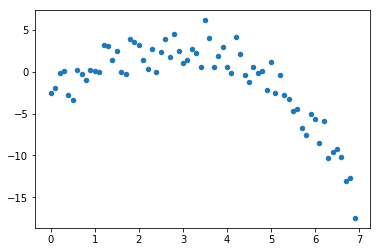

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:,0]     
y = xy_data[:,1]
plt.scatter(x, y, s=20)
plt.show()



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [4]:
def polyreg(data_matrix, k):
    # Your code here
    x_data = data_matrix[:,0]
    y_data = data_matrix[:,1]
    all_ones = np.ones(np.shape(x_data))
    xt = all_ones
    for i in range(k):
        xt = xt*x_data
        xt  = np.vstack((all_ones, xt))
    x = np.transpose(xt)
    if k==0:
        beta = np.mean(y_data)
    else:
        beta = np.linalg.inv(xt.dot(x)).dot(xt.dot(y_data))
        
    fit = x.dot(beta)
    resid = y_data - fit
    
    return [beta, fit, resid]
    #The function should return the the coefficient vector beta, the fit, and the vector of residuals
    

Use the tests below to check the outputs of the function you have written:

In [5]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

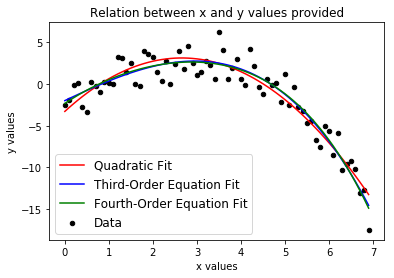

SSE_2 =  172.181  	 MSE_2 =  2.46
SSE_3 =  152.406  	 MSE_3 =  2.177
SSE_4 =  151.228  	 MSE_4 =  2.16
R^2 for the second-order linear model =  0.8876
R^2 for the third-order linear model =  0.9005
R^2 for the fourth-order linear model =  0.9013


In [10]:
#Your code here
x = xy_data[:,0]
y = xy_data[:,1]
yk2 = polyreg(xy_data, k=2)[1]
yk3 = polyreg(xy_data, k=3)[1]
yk4 = polyreg(xy_data, k=4)[1]
plt.scatter(x, y, s=20, color = 'black', label = 'Data')
plt.plot(x, yk2, color = 'red', label = 'Quadratic Fit')
plt.plot(x, yk3, color = 'blue', label = 'Third-Order Equation Fit')
plt.plot(x, yk4, color = 'green', label = 'Fourth-Order Equation Fit')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Relation between x and y values provided')
plt.legend(fontsize = 'large')
plt.show()
SSE_0 = np.linalg.norm(y - np.mean(y))**2
SSE_2 = np.linalg.norm(y - yk2)**2
MSE_2 = SSE_2/(np.size(y))
SSE_3 = np.linalg.norm(y - yk3)**2
MSE_3 = SSE_3/(np.size(y))
SSE_4 = np.linalg.norm(y - yk4)**2
MSE_4 = SSE_4/(np.size(y))
print('SSE_2 = ', np.round_(SSE_2, 3), ' \t MSE_2 = ', np.round_(MSE_2, 3))
print('SSE_3 = ', np.round_(SSE_3, 3), ' \t MSE_3 = ', np.round_(MSE_3, 3))
print('SSE_4 = ', np.round_(SSE_4, 3), ' \t MSE_4 = ', np.round_(MSE_4, 3))
print('R^2 for the second-order linear model = ', np.round_(1- SSE_2/SSE_0, 4))
print('R^2 for the third-order linear model = ', np.round_(1- SSE_3/SSE_0, 4))
print('R^2 for the fourth-order linear model = ', np.round_(1- SSE_4/SSE_0, 4))

 #### State which model you choose and briefly justify your choice.
 
 
I choose Third-Order Equation Fit (k=3), since the k=3 and k=4 lines are nearly identical, showing not much more information is gained by the inclusion of a fourth power, however the k=3 case gains a lot of new information over the k=2 case, as evidenced by the large rise in $R^2$ from k=2 to k=3, but not to k=4 (requiring rounding to 4 to even see a difference).
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

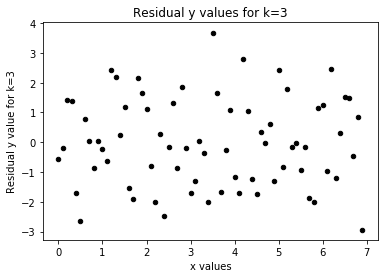

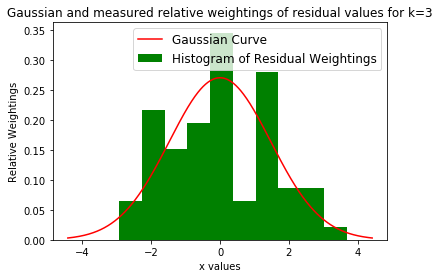

In [16]:
#Your code here
x = xy_data[:,0]
residk3 = polyreg(xy_data, k=3)[2]
plt.scatter(x, residk3, s=20, color = 'black')
plt.xlabel('x values')
plt.ylabel('Residual y value for k=3')
plt.title('Residual y values for k=3')
plt.show()

from scipy.stats import norm
n, bins, patches = plt.hist(residk3, bins=10, density=True, facecolor='green', label = 'Histogram of Residual Weightings');
residk3stdv = np.std(residk3)
xvals = np.linspace(-3*residk3stdv,3*residk3stdv,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=residk3stdv), 'r', label = 'Gaussian Curve')
plt.xlabel('x values')
plt.ylabel('Relative Weightings')
plt.title('Gaussian and measured relative weightings of residual values for k=3')
plt.legend(fontsize = 'large')
plt.show()